# Telecom Churn - ML Group Case Study

# Objective : To reduce customer churn,need to predict which customers are at high risk of churn.

In [58]:
# import functions from libraries that is used in the solution
import numpy as np
import pandas as pd
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
import statsmodels.api as sm
#Load the data from CSV file
telecom = pd.read_csv("telecom_churn_data.csv",encoding = "ISO-8859-1")
print(telecom.shape)

(99999, 226)


# We see there are 226 columns and 99999 rows in the dataframe

In [59]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


# Data Preparation

In [60]:
# Drop irrelevant fields

telecom = telecom.drop(['circle_id'], axis=1)




In [63]:
# Check % of null values for all columns
print((round(100*(telecom.isnull().sum()/len(telecom.index)),2)))

mobile_number            0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
loc_og_t2t_mou_7         3.86
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

In [64]:
# Function to calculate percentage of NaN values in DataFrame and only include columns that contain any NaN values
def get_percentage_missing(series):
    num = series.isnull().sum()
    den = len(series)
    return round(100*(num/den), 2)
df_with_any_null_values = telecom[telecom.columns[telecom.isnull().any()].tolist()]
get_percentage_missing(df_with_any_null_values)

loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
loc_og_t2t_mou_7         3.86
loc_og_t2t_mou_8         5.38
loc_og_t2t_mou_9         7.75
loc_og_t2m_mou_6         3.94
loc_og_t2m_mou_7         3.86
loc_og_t2m_mou_8         5.38
loc_og_t2m_mou_9         7.75
                        ...  
max_rech_data_8         73.66
max_rech_data_9         74.08
count_rech

In [65]:
# Fill NaN values in important columns with either 0 or -1 as they are numerical columns with depedency
#on other referenced columns.Treating columns that more than 70% missing values

telecom['total_rech_data_6'].fillna(0, inplace=True)
telecom['total_rech_data_7'].fillna(0, inplace=True)
telecom['total_rech_data_8'].fillna(0, inplace=True)
telecom['total_rech_data_9'].fillna(0, inplace=True)
telecom['av_rech_amt_data_6'].fillna(0, inplace=True)
telecom['av_rech_amt_data_7'].fillna(0, inplace=True)
telecom['av_rech_amt_data_8'].fillna(0, inplace=True)
telecom['av_rech_amt_data_9'].fillna(0, inplace=True)
telecom['max_rech_data_6'].fillna(0, inplace=True)
telecom['max_rech_data_7'].fillna(0, inplace=True)
telecom['max_rech_data_8'].fillna(0, inplace=True)
telecom['max_rech_data_9'].fillna(0, inplace=True)
telecom['count_rech_2g_6'].fillna(0, inplace=True)
telecom['count_rech_2g_7'].fillna(0, inplace=True)
telecom['count_rech_2g_8'].fillna(0, inplace=True)
telecom['count_rech_2g_9'].fillna(0, inplace=True)
telecom['count_rech_3g_6'].fillna(0, inplace=True)
telecom['count_rech_3g_7'].fillna(0, inplace=True)
telecom['count_rech_3g_8'].fillna(0, inplace=True)
telecom['count_rech_3g_9'].fillna(0, inplace=True)
telecom['arpu_3g_6'].fillna(0, inplace=True)
telecom['arpu_3g_7'].fillna(0, inplace=True)
telecom['arpu_3g_8'].fillna(0, inplace=True)
telecom['arpu_3g_9'].fillna(0, inplace=True)
telecom['arpu_2g_6'].fillna(0, inplace=True)
telecom['arpu_2g_7'].fillna(0, inplace=True)
telecom['arpu_2g_8'].fillna(0, inplace=True)
telecom['arpu_2g_9'].fillna(0, inplace=True)
telecom['night_pck_user_6'].fillna(-1, inplace=True)
telecom['night_pck_user_7'].fillna(-1, inplace=True)
telecom['night_pck_user_8'].fillna(-1, inplace=True)
telecom['night_pck_user_9'].fillna(-1, inplace=True)
telecom['fb_user_6'].fillna(-1, inplace=True)
telecom['fb_user_7'].fillna(-1, inplace=True)
telecom['fb_user_8'].fillna(-1, inplace=True)
telecom['fb_user_9'].fillna(-1, inplace=True)

In [66]:
#Filling missing values in date fields using forward fill in panda dataframe 
telecom['last_date_of_month_6']=telecom['last_date_of_month_6'].replace({'':np.nan}).ffill()
telecom['last_date_of_month_7']=telecom['last_date_of_month_7'].replace({'':np.nan}).ffill()
telecom['last_date_of_month_8']=telecom['last_date_of_month_8'].replace({'':np.nan}).ffill()
telecom['last_date_of_month_9']=telecom['last_date_of_month_9'].replace({'':np.nan}).ffill()
telecom['date_of_last_rech_data_6']=telecom['date_of_last_rech_data_6'].replace({'':np.nan}).ffill()
telecom['date_of_last_rech_data_7']=telecom['date_of_last_rech_data_7'].replace({'':np.nan}).ffill()
telecom['date_of_last_rech_data_8']=telecom['date_of_last_rech_data_8'].replace({'':np.nan}).ffill()
telecom['date_of_last_rech_data_9']=telecom['date_of_last_rech_data_9'].replace({'':np.nan}).ffill()
telecom['date_of_last_rech_6']=telecom['date_of_last_rech_6'].replace({'':np.nan}).ffill()
telecom['date_of_last_rech_7']=telecom['date_of_last_rech_7'].replace({'':np.nan}).ffill()
telecom['date_of_last_rech_8']=telecom['date_of_last_rech_8'].replace({'':np.nan}).ffill()
telecom['date_of_last_rech_9']=telecom['date_of_last_rech_9'].replace({'':np.nan}).ffill()

In [67]:
# Checking NaN values again by only including columns that contain any NaN values
df_with_any_null_values = telecom[telecom.columns[telecom.isnull().any()].tolist()]
get_percentage_missing(df_with_any_null_values)

loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t_mou_7            3.86
loc_og_t2t_mou_8            5.38
loc_og_t2t_mou_9            7.75
loc_og_t2m_mou_6            3.94
loc_og_t2m_mou_7            3.86
loc_og_t2m_mou_8            5.38
loc_og_t2m_mou_9            7.75
loc_og_t2f_mou_6            3.94
loc_og_t2f_mou_7            3.86
loc_og_t2f_mou_8            5.38
          

In [68]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 225 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(34), object(12)
memory usage: 171.7+ MB


# We see that most columns still have NaN values but the % has reduced significantly.We will treat this later but for now lets check the NaN's in rows.

In [69]:
# Check the maximum number of NaN's in rows
telecom.isnull().sum(axis=1).max()

119

In [70]:
# Lets check how many rows have 50% of the data missing based on 210 columns
#telecom.apply(lambda x: x.count(), axis=1)
len(telecom[telecom.isnull().sum(axis=1) > 113].index)

1018

# Since 1018 rows are missing 50% of the data we eliminate those rows which is 1% the entire dataset.

In [71]:
#Since 1018 rows are missing 50% of the data we eliminate those rows which is 1% the entire dataset.
telecom = telecom[telecom.isnull().sum(axis=1) <= 113]

In [72]:
# Checking NaN values again by only including columns that contain any NaN values
df_with_any_null_values = telecom[telecom.columns[telecom.isnull().any()].tolist()]
get_percentage_missing(df_with_any_null_values)

onnet_mou_6                 2.95
onnet_mou_7                 2.87
onnet_mou_8                 4.40
onnet_mou_9                 6.80
offnet_mou_6                2.95
offnet_mou_7                2.87
offnet_mou_8                4.40
offnet_mou_9                6.80
roam_ic_mou_6               2.95
roam_ic_mou_7               2.87
roam_ic_mou_8               4.40
roam_ic_mou_9               6.80
roam_og_mou_6               2.95
roam_og_mou_7               2.87
roam_og_mou_8               4.40
roam_og_mou_9               6.80
loc_og_t2t_mou_6            2.95
loc_og_t2t_mou_7            2.87
loc_og_t2t_mou_8            4.40
loc_og_t2t_mou_9            6.80
loc_og_t2m_mou_6            2.95
loc_og_t2m_mou_7            2.87
loc_og_t2m_mou_8            4.40
loc_og_t2m_mou_9            6.80
loc_og_t2f_mou_6            2.95
loc_og_t2f_mou_7            2.87
loc_og_t2f_mou_8            4.40
loc_og_t2f_mou_9            6.80
loc_og_t2c_mou_6            2.95
loc_og_t2c_mou_7            2.87
          

# Since all the columns that have missing values are numeric we can imput the missing values with 0 for these columns

In [73]:
# Fill missing values with 0
telecom.fillna(0, inplace=True)

# Check for columns have missing values
df_with_any_null_values = telecom[telecom.columns[telecom.isnull().any()].tolist()]
get_percentage_missing(df_with_any_null_values)   

Series([], dtype: float64)

In [74]:
telecom.isnull().sum(axis=0).max()

0

In [75]:
telecom.isnull().sum(axis=1).max()

0

In [76]:
# Checking the entire dataset for missing values
print((round(100*(telecom.isnull().sum()/len(telecom.index)),2)))

mobile_number           0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
last_date_of_month_9    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_ic_mou_9           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
roam_og_mou_9           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
                       ... 
arpu_2g_9               0.0
night_pck_user_6        0.0
night_pck_user_7        0.0
night_pck_user_8        0.0
night_pck_user_9    

# Now we have treated all the columns we now need to identify the categorical columns

In [77]:
# Find categorical/date variables
cols = telecom.columns
num_cols = telecom._get_numeric_data().columns
num_cols
list(set(cols) - set(num_cols))


['last_date_of_month_8',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'last_date_of_month_9',
 'last_date_of_month_7',
 'date_of_last_rech_data_6',
 'date_of_last_rech_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'last_date_of_month_6',
 'date_of_last_rech_data_9',
 'date_of_last_rech_9']

# Create dummies for categorical columns

In [78]:
# Create dummies for 9 out of 12 categorical/date variables that have been identified.
#We have left out columns ending with "_9" as they will be deleted after finding high value customers

df_date_of_last_rech_7 = pd.get_dummies(telecom['date_of_last_rech_7'])
df_date_of_last_rech_8 = pd.get_dummies(telecom['date_of_last_rech_8'])
df_date_of_last_rech_6 = pd.get_dummies(telecom['date_of_last_rech_6'])
df_last_date_of_month_6 = pd.get_dummies(telecom['last_date_of_month_6'])
df_last_date_of_month_7 = pd.get_dummies(telecom['last_date_of_month_7'])
df_last_date_of_month_8 = pd.get_dummies(telecom['last_date_of_month_8'])
df_date_of_last_rech_data_6 = pd.get_dummies(telecom['date_of_last_rech_data_6'])
df_date_of_last_rech_data_7 = pd.get_dummies(telecom['date_of_last_rech_data_7'])
df_date_of_last_rech_data_8 = pd.get_dummies(telecom['date_of_last_rech_data_8'])

telecom.drop(['date_of_last_rech_6'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_7'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_8'], axis = 1, inplace = True)
telecom.drop(['last_date_of_month_6'], axis = 1, inplace = True)
telecom.drop(['last_date_of_month_7'], axis = 1, inplace = True)
telecom.drop(['last_date_of_month_8'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_data_6'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_data_7'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_data_8'], axis = 1, inplace = True)

telecom_final = pd.concat([telecom, df_date_of_last_rech_7,df_date_of_last_rech_8,df_date_of_last_rech_6,df_date_of_last_rech_data_6,df_date_of_last_rech_data_7,df_date_of_last_rech_data_8,df_last_date_of_month_6,df_last_date_of_month_7,df_last_date_of_month_8], axis=1)

telecom_final.head(5)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,8/31/2014,8/4/2014,8/5/2014,8/6/2014,8/7/2014,8/8/2014,8/9/2014,6/30/2014,7/31/2014,8/31/2014
0,7000842753,0.0,0.0,0.0,9/30/2014,197.385,214.816,213.803,21.100,0.00,...,0,0,0,0,0,1,0,1,1,1
1,7001865778,0.0,0.0,0.0,9/30/2014,34.047,355.074,268.321,86.285,24.11,...,0,0,0,0,0,0,0,1,1,1
2,7001625959,0.0,0.0,0.0,9/30/2014,167.690,189.058,210.226,290.714,11.54,...,0,0,0,0,0,0,0,1,1,1
3,7001204172,0.0,0.0,0.0,9/30/2014,221.338,251.102,508.054,389.500,99.91,...,0,0,0,0,0,0,0,1,1,1
4,7000142493,0.0,0.0,0.0,9/30/2014,261.636,309.876,238.174,163.426,50.31,...,0,0,0,0,0,0,0,1,1,1


# Checking for Outliers in important Numerical columns which will be used to find High Value Customers

In [79]:
num_telecom =telecom_final[['total_rech_amt_6','total_rech_amt_7']]

In [80]:
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,total_rech_amt_6,total_rech_amt_7
count,98981.000000,98981.000000
mean,328.954941,325.043988
std,398.764991,409.029536
min,0.000000,0.000000
25%,110.000000,100.000000
50%,230.000000,220.000000
75%,440.000000,430.000000
90%,735.000000,735.000000
95%,996.000000,996.000000
99%,1687.000000,1731.200000


# From the distribution shown above,the numbers are gradually increasing.However all the rech amount are below 20000 except the max which is an outlier and hence has to be treated

In [81]:
# Delete the outlier data
telecom_final=telecom_final.ix[~(telecom_final['total_rech_amt_6'] == 35190)]


C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [82]:
# Check for outliers again
num_telecom =telecom_final[['total_rech_amt_6','total_rech_amt_7']]
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,total_rech_amt_6,total_rech_amt_7
count,98980.000000,98980.000000
mean,328.602738,324.639766
std,383.062286,388.759046
min,0.000000,0.000000
25%,110.000000,100.000000
50%,230.000000,220.000000
75%,440.000000,430.000000
90%,734.100000,735.000000
95%,996.000000,996.000000
99%,1686.210000,1730.210000


# Finding High Value Customers - Average amount recharged for the 6 and 7 month

In [83]:
# To find the High Value Customer (HVC)
# Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, 
#where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
telecom_final['tot_recharge_6_7'] = round((telecom_final['total_rech_amt_6'] + telecom_final['total_rech_amt_7'])/2)
telecom_final['tot_recharge_6_7']

0         307.0
1         229.0
2         242.0
3         270.0
4         273.0
5          60.0
6         360.0
7        1185.0
8         519.0
9         208.0
10          0.0
11        183.0
12        110.0
13        380.0
14         50.0
15        343.0
16        459.0
17        408.0
18         45.0
19        224.0
20        344.0
21        640.0
22        142.0
23        227.0
24        385.0
25        311.0
26         77.0
27         30.0
28         96.0
29         98.0
          ...  
99967      85.0
99968      88.0
99969      74.0
99970     392.0
99971     165.0
99972       0.0
99973     114.0
99974     465.0
99975      82.0
99976     244.0
99977      90.0
99979      55.0
99980     343.0
99981     312.0
99982      77.0
99983     195.0
99984     300.0
99985      48.0
99986     848.0
99987     186.0
99988     467.0
99989     145.0
99990      94.0
99991     160.0
99992     120.0
99994      85.0
99995     110.0
99996      60.0
99997     370.0
99998     355.0
Name: tot_recharge_6_7, 

In [84]:
telecom_final.sort_values("tot_recharge_6_7", axis=0, ascending=True, inplace=True)


In [85]:
#Find the 70th percentile of the average recharge amount in the first two months
percentile_70=telecom_final.tot_recharge_6_7.quantile(0.7) # 70th percentile
percentile_70

370.0

# The 70 percetile of average of recharge amount in 6 and 7 months is "370".We now derive HVC based on this number

In [86]:
#Extracting the HVC customers using 70 percentile
telecom_hvc = pd.DataFrame(telecom_final.loc[(telecom_final.tot_recharge_6_7 >= percentile_70), :])
telecom_hvc.tail()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,8/4/2014,8/5/2014,8/6/2014,8/7/2014,8/8/2014,8/9/2014,6/30/2014,7/31/2014,8/31/2014,tot_recharge_6_7
69968,7000439270,0.0,0.0,0.0,9/30/2014,7748.779,7386.464,6210.072,4528.352,383.59,...,0,0,0,0,0,0,1,1,1,8735.0
98208,7001719918,0.0,0.0,0.0,9/30/2014,10877.945,6498.408,5880.292,3419.159,147.84,...,0,0,0,0,0,0,1,1,1,10265.0
67717,7002155380,0.0,0.0,0.0,9/30/2014,11261.349,16820.145,12533.285,14997.307,9.29,...,0,0,0,0,0,0,1,1,1,16150.0
51314,7000777972,0.0,0.0,0.0,9/30/2014,15487.684,14624.089,16040.503,8160.738,0.18,...,0,0,0,0,0,0,1,1,1,17282.0
33019,7002226643,0.0,0.0,0.0,9/30/2014,10955.066,8609.460,13505.996,10787.982,0.00,...,0,0,0,0,0,0,1,1,1,18750.0


In [87]:
telecom_hvc.mobile_number.count()

29825

# We get 29825 high value customers which is as expected. 

# Tag churners and remove attributes of the churn phase

In [88]:
#Tag the churned customers (churn=1, else 0) based on the fourth month as follows:
#Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

telecom_hvc['tot_usage_9'] = telecom_hvc['total_ic_mou_9'] + telecom_hvc['total_og_mou_9'] + telecom_hvc['vol_2g_mb_9'] + telecom_hvc['vol_3g_mb_9']
telecom_hvc['churn'] = (telecom_hvc['tot_usage_9'] == 0).astype(int)
telecom_hvc.tail(10)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,8/6/2014,8/7/2014,8/8/2014,8/9/2014,6/30/2014,7/31/2014,8/31/2014,tot_recharge_6_7,tot_usage_9,churn
22370,7000021887,0.0,0.0,0.0,9/30/2014,9394.536,2227.569,0.000,0.000,88.39,...,0,0,0,0,1,1,1,6950.0,0.00,1
80414,7002208655,0.0,0.0,0.0,9/30/2014,8598.530,4122.626,8058.772,3169.604,202.11,...,0,0,0,0,1,1,1,7360.0,3423.65,0
10484,7000474568,0.0,0.0,0.0,9/30/2014,5220.209,5451.082,8989.682,5412.545,144.46,...,0,0,0,0,1,1,1,7644.0,291.72,0
78970,7002107447,0.0,0.0,0.0,9/30/2014,4513.948,6876.324,5228.826,0.000,188.59,...,0,0,0,0,1,1,1,7728.0,0.00,1
61944,7002051163,0.0,0.0,0.0,9/30/2014,26.240,13224.119,2026.468,0.000,0.00,...,0,0,0,0,1,1,1,8507.0,0.00,1
69968,7000439270,0.0,0.0,0.0,9/30/2014,7748.779,7386.464,6210.072,4528.352,383.59,...,0,0,0,0,1,1,1,8735.0,1565.10,0
98208,7001719918,0.0,0.0,0.0,9/30/2014,10877.945,6498.408,5880.292,3419.159,147.84,...,0,0,0,0,1,1,1,10265.0,891.72,0
67717,7002155380,0.0,0.0,0.0,9/30/2014,11261.349,16820.145,12533.285,14997.307,9.29,...,0,0,0,0,1,1,1,16150.0,1944.94,0
51314,7000777972,0.0,0.0,0.0,9/30/2014,15487.684,14624.089,16040.503,8160.738,0.18,...,0,0,0,0,1,1,1,17282.0,2983.71,0
33019,7002226643,0.0,0.0,0.0,9/30/2014,10955.066,8609.460,13505.996,10787.982,0.00,...,0,0,0,0,1,1,1,18750.0,85.92,0


In [89]:
print(telecom_hvc.shape)

(29825, 406)


# Remove all the attributes corresponding to the churn phase

In [90]:
#After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
telecom_hvc = telecom_hvc.loc[:, ~telecom_hvc.columns.str.endswith('_9')]

In [91]:
print(telecom_hvc.shape)

(29825, 351)


# Feature Standardisation

In [92]:
# Normalising numeric features
df = telecom_hvc[['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8',
'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6',
'loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7',
'loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8',
'std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7',
'spl_og_mou_8','og_others_6','og_others_7','og_others_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6',
'loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7',
'std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8',
'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7',
'total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7',
'total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','arpu_3g_6','arpu_3g_7','arpu_3g_8',
'arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8',
'monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','fb_user_6','fb_user_7','fb_user_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g',
'tot_recharge_6_7']]

In [93]:
normalized_df=(df-df.mean())/df.std()
telecom_hvc = telecom_hvc.drop(['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8',
'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6',
'loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7',
'loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8',
'std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7',
'spl_og_mou_8','og_others_6','og_others_7','og_others_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6',
'loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7',
'std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8',
'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7',
'total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7',
'total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','arpu_3g_6','arpu_3g_7','arpu_3g_8',
'arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8',
'monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','fb_user_6','fb_user_7','fb_user_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g',
'tot_recharge_6_7'], 1)
telecom_hvc = pd.concat([telecom_hvc,normalized_df],axis=1)
telecom_hvc.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_recharge_6_7
79197,7001348064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.144391,-0.764438,-0.777667,1.385285,0.398721,-0.331226,-0.330892,-0.310971,-0.135086,-0.741843
79408,7001885268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.144391,-0.764438,-0.777667,-0.775826,-0.230605,-0.331226,-0.330892,-0.310971,-0.135086,-0.741843
223,7000787116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.144391,-0.764438,-0.777667,-0.775826,-0.407923,-0.331226,-0.330892,-0.310971,-0.135086,-0.741843
38250,7002370425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.144391,1.366145,1.348362,1.385285,1.172567,0.731359,0.018036,0.205629,-0.135086,-0.741843
22004,7001797429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.144391,-0.764438,-0.777667,-0.775826,-0.798433,-0.331226,-0.330892,-0.310971,-0.135086,-0.741843


# Find the Churn Rate

In [94]:
churn = (sum(telecom_hvc['churn'])/len(telecom_hvc['churn'].index))*100
churn

8.502933780385582

In [95]:
# Class Imbalance using Up-sample Minority Class
from sklearn.utils import resample
telecom_hvc['churn'].value_counts()

0    27289
1     2536
Name: churn, dtype: int64

# This is a case of Class Imbalance as the churn ration is just 8.5% out of 29825.We treat this imbalance using resampling technique

# Class Imbalance using Up-sample Minority Class
We separate observations from each class into different DataFrames.Next we resample the minority class with replacement, setting the number of samples to match that of the majority class.We then combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [96]:
# Separate majority and minority classes from HVC dataframe
df_maj = telecom_hvc[telecom_hvc.churn==0]
df_min = telecom_hvc[telecom_hvc.churn==1]

In [97]:
df_maj.info()
df_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27289 entries, 79197 to 33019
Columns: 351 entries, mobile_number to tot_recharge_6_7
dtypes: float64(162), int32(1), int64(1), uint8(187)
memory usage: 39.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2536 entries, 47593 to 61944
Columns: 351 entries, mobile_number to tot_recharge_6_7
dtypes: float64(162), int32(1), int64(1), uint8(187)
memory usage: 3.6 MB


In [99]:
# Resample the minority data(churn ==1) 
df_min_upsampled = resample(df_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=27289,    # to match majority class
                                 random_state=123)

In [100]:
df_min_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27289 entries, 25572 to 13171
Columns: 351 entries, mobile_number to tot_recharge_6_7
dtypes: float64(162), int32(1), int64(1), uint8(187)
memory usage: 39.1 MB


In [101]:
# Combine majority class with upsampled minority class
telecom_hvc_upsampled = pd.concat([df_maj, df_min_upsampled])
telecom_hvc_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54578 entries, 79197 to 13171
Columns: 351 entries, mobile_number to tot_recharge_6_7
dtypes: float64(162), int32(1), int64(1), uint8(187)
memory usage: 78.2 MB


In [102]:
# Display new class counts
telecom_hvc_upsampled.churn.value_counts()

1    27289
0    27289
Name: churn, dtype: int64

# telecom_hvc_upsampled dataframe has more observations than the original, and the ratio of the two classes is now 1:1.We will now check accuracy score by running this data through a regression model.

In [103]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom_hvc_upsampled.drop(['churn','mobile_number'],axis=1)
# Putting response variable to y
y = telecom_hvc_upsampled['churn']

# Using Logistic Regression
clf_1 = LogisticRegression().fit(X, y)
pred = clf_1.predict(X)
#Classes that are getting predicted
print( np.unique( pred ) )
# Accuracy Score
print( accuracy_score(y, pred) )


[0 1]
0.8526512514199861


# The model is predicting  both the classes [0 1].The accuracy is 85%.Hence we have a balanced dataset now

In [104]:
# Checking Churn rate again

In [105]:
churn = (sum(telecom_hvc_upsampled['churn'])/len(telecom_hvc_upsampled['churn'].index))*100
churn

50.0

# Model Building- We have a large number of attributes and we will use  dimensionality reduction technique PCA and then build a predictive model.

In [106]:
# Splitting Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [162]:
 y_test.head()

99769    0
96393    0
3196     0
36794    0
94411    1
Name: churn, dtype: int32

In [107]:
# Initiating PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [108]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [109]:
pca.components_

array([[ 2.42079023e-17, -5.55111512e-17, -2.22044605e-16, ...,
         1.26362685e-01,  3.10590387e-02,  5.96111605e-02],
       [-1.10485051e-16, -1.11022302e-16,  5.55111512e-17, ...,
        -6.47245566e-03,  7.52190784e-03,  2.26861653e-01],
       [ 6.06243083e-18,  5.55111512e-17,  6.93889390e-17, ...,
        -3.58154249e-02, -6.33916031e-03, -5.14432397e-02],
       ...,
       [ 0.00000000e+00, -8.61122836e-02, -4.14363886e-01, ...,
        -5.03069808e-17, -2.42861287e-17, -5.00988140e-15],
       [-0.00000000e+00,  6.19466240e-01,  1.23398941e-01, ...,
         2.77555756e-17,  7.37257477e-18, -7.97972799e-15],
       [ 9.99999995e-01,  1.13554510e-05,  3.16872290e-06, ...,
        -6.72904149e-16, -1.00355987e-16,  5.01741576e-15]])

In [110]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2
0,loc_og_t2o_mou,2.420790e-17,-1.104851e-16
1,std_og_t2o_mou,-5.551115e-17,-1.110223e-16
2,loc_ic_t2o_mou,-2.220446e-16,5.551115e-17
3,std_og_t2c_mou_6,0.000000e+00,-0.000000e+00
4,std_og_t2c_mou_7,-3.469447e-18,-6.938894e-18


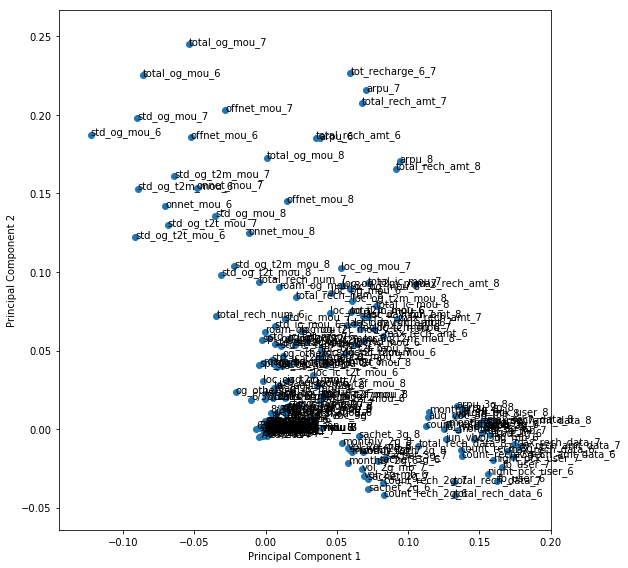

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [112]:
pca.explained_variance_ratio_

array([1.03726876e-01, 7.58451758e-02, 5.92236217e-02, 5.24887925e-02,
       4.14998271e-02, 3.96169838e-02, 3.50900954e-02, 3.28338006e-02,
       3.16816492e-02, 2.34136317e-02, 2.05894577e-02, 1.82268238e-02,
       1.70311649e-02, 1.63772506e-02, 1.59779804e-02, 1.54410973e-02,
       1.37592106e-02, 1.36347143e-02, 1.28375710e-02, 1.23155100e-02,
       1.18402215e-02, 1.16872425e-02, 1.09831234e-02, 1.08079240e-02,
       1.00518484e-02, 9.56859849e-03, 9.42958515e-03, 8.36913265e-03,
       7.92626202e-03, 7.82468708e-03, 7.49068906e-03, 6.92173766e-03,
       6.88510809e-03, 6.71454697e-03, 6.52484040e-03, 6.31636143e-03,
       6.09984021e-03, 5.90843005e-03, 5.77838102e-03, 5.70382881e-03,
       5.53648821e-03, 5.45612198e-03, 5.27117260e-03, 4.89624703e-03,
       4.82626337e-03, 4.63584107e-03, 4.43671838e-03, 4.28043165e-03,
       4.17507486e-03, 3.89834491e-03, 3.84708262e-03, 3.64362363e-03,
       3.54050041e-03, 3.45247712e-03, 3.40930905e-03, 3.17276082e-03,
      

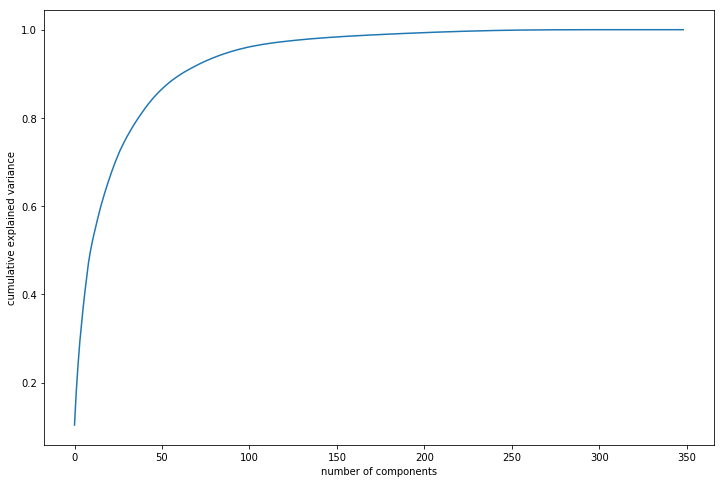

In [113]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# Letting PCA select the number of components based on a variance cutoff of 90 %

In [114]:
pca_again = PCA(0.80)

In [116]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 38 components

(38204, 38)

# Number of components is 38 based on a variance cutoff of 80 %

In [117]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca2.transpose())

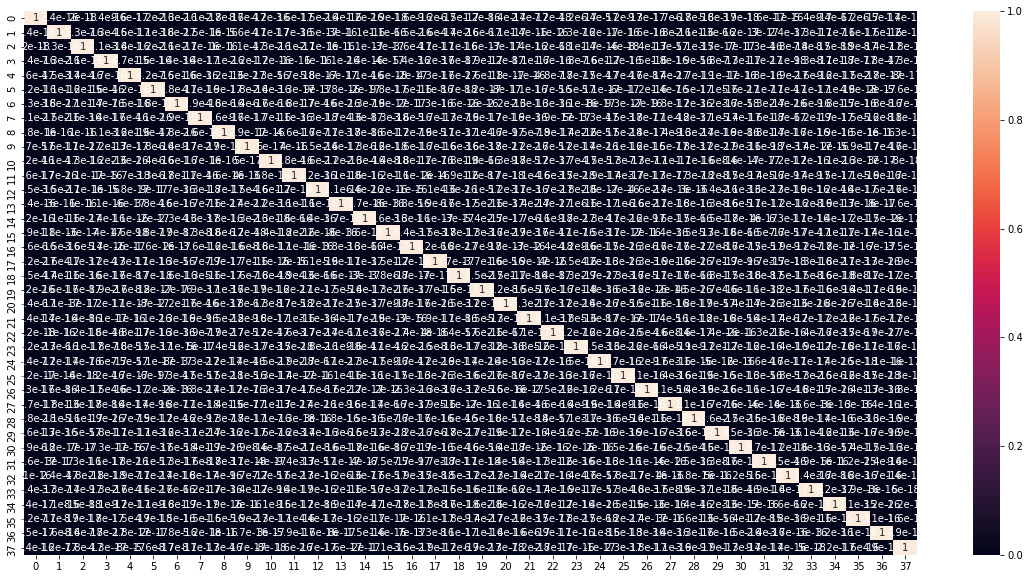

In [118]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [119]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(), )
# we see that correlations are indeed very close to 0

max corr: 1.1837409078390578e-15 , min corr:  -9.643017698728638e-16


# Applying Logistic regresssion to principal components

In [120]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [121]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(16374, 38)

In [122]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.89'

# Accuracy score is 89% on prediction

# Building the other Models - Start with Logistic Regression Model

In [124]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38204
Model:                            GLM   Df Residuals:                    37881
Model Family:                Binomial   Df Model:                          322
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -13296.
Date:                Sat, 25 Aug 2018   Deviance:                       26593.
Time:                        01:54:01   Pearson chi2:                 1.23e+05
No. Iterations:                    22                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
loc_og_t2o_mou     -2.445e-10    2.6e-10     -0.939      0.348   -7.55e-10    2.66e-10
std_og_t2o_mou      3.831e-08   7.06e-07      0.054      0.957   -1.35e-06    1.42e-06
loc_ic_t2o_mou      4.448e-08    1.3e-06      0.034      0.973    -2.5e-06    2.59e-06
std_og_t2c_mou_6    2.017e-08   7.18e-07      0.028      0.978   -1.39e-06    1.43e-06
std_og_t2c_mou_7   -5.374e-10   1.45e-06     -0.000      1.000   -2.84e-06    2.84e-06
std_og_t2c_mou_8   -1.196e-08   7.86e-07     -0.015      0.988   -1.55e-06    1.53e-06
std_ic_t2o_mou_6     2.79e-08   1.15e-06      0.024      0.981   -2.22e-06    2.28e-06
std_ic_t2o_mou_7    7.078e-08   1.17e-06      0.060      0.952   -2.22e-06    2.36e-06
std_ic_t2o_mou_8   -2.229e-07   9.84e-07     -0.227      0.821   -2.15e-06    1.71e-06
7/1/2014               1.1458     15.274      0.075      0.940     -28.791      31.082
7/10/2014              0.2507     15.254      0.016      0.987     -29.646      30.148
7/11/2014             -0.2289     15.253     -0.015      0.988     -30.125      29.667
7/12/2014             -0.4557     15.253     -0.030      0.976     -30.351      29.440
7/13/2014             -0.0336     15.255     -0.002      0.998     -29.932      29.865
7/14/2014              0.2072     15.253      0.014      0.989     -29.688      30.102
7/15/2014             -0.7515     15.251     -0.049      0.961     -30.644      29.141
7/16/2014             -0.4324     15.251     -0.028      0.977     -30.324      29.460
7/17/2014              0.3382     15.252      0.022      0.982     -29.554      30.231
7/18/2014             -0.8129     15.252     -0.053      0.957     -30.706      29.080
7/19/2014             -0.6019     15.252     -0.039      0.969     -30.494      29.291
7/2/2014               1.8695     15.279      0.122      0.903     -28.077      31.816
7/20/2014             -0.8740     15.251     -0.057      0.954     -30.766      29.018
7/21/2014              0.0813     15.251      0.005      0.996     -29.811      29.974
7/22/2014             -0.7947     15.251     -0.052      0.958     -30.686      29.097
7/23/2014             -0.7290     15.251     -0.048      0.962     -30.621      29.163
7/24/2014             -0.5500     15.251     -0.036      0.971     -30.442      29.341
7/25/2014             -0.4989     15.251     -0.033      0.974     -30.390      29.392
7/26/2014             -0.5130     15.251     -0.034      0.973     -30.404      29.378
7/27/2014             -0.5110     15.251     -0.034      0.973     -30.402      29.380
7/28/2014             -0.6296     15.251     -0.041      0.967     -30.521      29.261
7/29/2014             -0.2816     15.251     -0.018      0.985     -30.173      29.609
7/3/2014               0.1048     15.259      0.007      0.995     -29.802      30.011
7/30/2014             -0.1802     15.251     -0.012      0.991     -30.071      29.711
7/31/2014             -0.2172 

# Feature selection using RFE

In [128]:
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False False False False False  True False False
 False False False False False False False False  True False False False
 False False False False False False False False False False  True  True
  True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False False False False False False  True
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [129]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [131]:
elim = X_train.columns[~rfe.support_]
elim

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', '7/10/2014',
       ...
       'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'tot_recharge_6_7'],
      dtype='object', length=334)

In [132]:
col = X_train.columns[rfe.support_]
col 

Index(['7/1/2014', '7/2/2014', '7/4/2014', '7/5/2014', '7/6/2014', '7/8/2014',
       '8/30/2014', '8/31/2014', '6/1/2014', '6/2/2014', '6/6/2014',
       'onnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'loc_ic_mou_8'],
      dtype='object')

In [135]:
X_train_rfe = X_train[col]
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train_rfe, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [136]:
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm2 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38204
Model:                            GLM   Df Residuals:                    38177
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -18236.
Date:                Sat, 25 Aug 2018   Deviance:                       36472.
Time:                        11:45:37   Pearson chi2:                 2.26e+08
No. Iterations:                    22                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
7/1/2014             2.5718      0.828      3.106      0.002       0.949       4.195
7/1/2014             0.7876      0.118      6.678      0.000       0.556       1.019
7/2/2014             2.2975      0.785      2.925      0.003       0.758       3.837
7/2/2014             0.4846      0.121      3.996      0.000       0.247       0.722
7/4/2014             1.5768      0.391      4.032      0.000       0.810       2.343
7/4/2014            -0.2178      0.096     -2.273      0.023      -0.406      -0.030
7/5/2014             1.7917      0.648      2.764      0.006       0.521       3.062
7/5/2014             0.1023      0.086      1.189      0.235      -0.066       0.271
7/6/2014             1.5557      0.348      4.468      0.000       0.873       2.238
7/6/2014            -0.0260      0.097     -0.267      0.790      -0.217       0.165
7/8/2014             1.1367      0.333      3.412      0.001       0.484       1.790
7/8/2014            -0.0205      0.088     -0.234      0.815      -0.192       0.151
8/30/2014           -1.3219      0.043    -30.983      0.000      -1.406      -1.238
8/30/2014            0.1528      0.051      2.985      0.003       0.052       0.253
8/31/2014           -1.9074      0.042    -45.225      0.000      -1.990      -1.825
8/31/2014            0.2230      0.051      4.339      0.000       0.122       0.324
8/31/2014           -0.8007      0.024    -33.279      0.000      -0.848      -0.754
6/1/2014           -23.3446   3.03e+04     -0.001      0.999   -5.94e+04    5.94e+04
6/1/2014            -0.1961      0.116     -1.693      0.091      -0.423       0.031
6/2/2014           -24.7145   1.91e+04     -0.001      0.999   -3.75e+04    3.74e+04
6/2/2014            -0.0199      0.108     -0.183      0.854      -0.232       0.193
6/6/2014           -23.9432   3.33e+04     -0.001      0.999   -6.53e+04    6.53e+04
6/6/2014             0.1937      0.083      2.336      0.020       0.031       0.356
onnet_mou_8          1.3617      0.086     15.769      0.000       1.192       1.531
loc_og_mou_8        -1.6189      0.054    -29.776      0.000      -1.725      -1.512
std_og_t2t_mou_8    -1.5199      0.079    -19.272      0.000      -1.674      -1.365
loc_ic_mou_8        -1.5601      0.046    -34.123      0.000      -1.650      -1.470
====================================================================================
"""

In [138]:
X_test[col].shape
#res = modres.predict(X_test

(16374, 27)

In [139]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.320621
1,0.264603
2,0.037244
3,0.029416
4,0.818997


In [156]:
y_test.head()

99769    0
96393    0
3196     0
36794    0
94411    1
Name: churn, dtype: int32

In [140]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
99769,0
96393,0
3196,0
36794,0
94411,1


In [154]:
y_test_df.index

RangeIndex(start=0, stop=16374, step=1)

In [155]:
# Putting mobile number to index
y_test_df['mobile_number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['mobile_number','churn','churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


,mobile_number,churn,churn_Prob
0,0,0,0.320621
1,1,0,0.264603
2,2,0,0.037244
3,3,0,0.029416
4,4,1,0.818997


In [158]:
y_pred_1

,1
0,0.320621
1,0.264603
2,0.037244
3,0.029416
4,0.818997
5,0.086429
6,0.803307
7,0.767322
8,0.635724
9,0.087430


In [144]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,mobile_number,churn,churn_Prob,predicted
0,0,0,0.320621,0
1,1,0,0.264603,0
2,2,0,0.037244,0
3,3,0,0.029416,0
4,4,1,0.818997,1


In [146]:
# Model Evaluation
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[5967, 2220],
       [1272, 6915]], dtype=int64)

In [148]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.7867350677903994

In [149]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

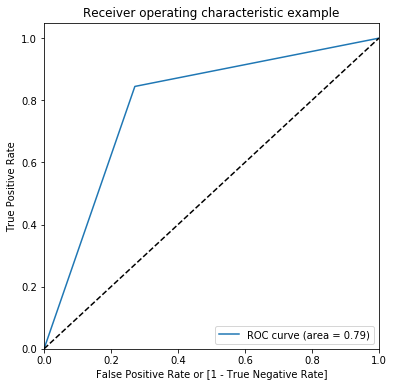

(array([0.       , 0.2711616, 1.       ]),
 array([0.        , 0.84463173, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [150]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [152]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.churn_Prob))

'0.87'

# We see Logistic Regression Model overall AUC score of 0.87 

# Building the other Models - Random Forest Model

In [163]:
# Let's first fit a random forest model with default hyperparameters.
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [164]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [167]:
# Making predictions
predictions = rfc.predict(X_test)

In [168]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [169]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99      8187
          1       0.97      1.00      0.99      8187

avg / total       0.99      0.99      0.99     16374



In [170]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7971  216]
 [   0 8187]]


In [171]:
print(accuracy_score(y_test,predictions))

0.9868083547086846


# Tune Hyperparameters - Let's try to find the optimum values for max_depth 

In [172]:
# Now lets tune Hyperparameters
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [173]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.485524,0.039538,0.798634,0.797089,2,{'max_depth': 2},4,0.794426,0.796970,0.806857,...,0.794895,0.789131,0.802094,0.796460,0.794895,0.798979,0.118336,0.006867,0.005005,0.004771
1,1.006405,0.054224,0.877919,0.887760,7,{'max_depth': 7},3,0.877650,0.891761,0.882753,...,0.873037,0.883294,0.879712,0.890001,0.876440,0.890558,0.278947,0.017982,0.003246,0.003734
2,1.414178,0.069004,0.952675,0.966640,12,{'max_depth': 12},2,0.948443,0.962928,0.956556,...,0.954058,0.966955,0.952094,0.966758,0.952225,0.970325,0.114005,0.027447,0.002662,0.002351
3,1.786397,0.055126,0.976756,0.990008,17,{'max_depth': 17},1,0.974352,0.989595,0.976577,...,0.977487,0.990348,0.979450,0.989628,0.975916,0.990741,0.370822,0.006879,0.001692,0.000458


C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


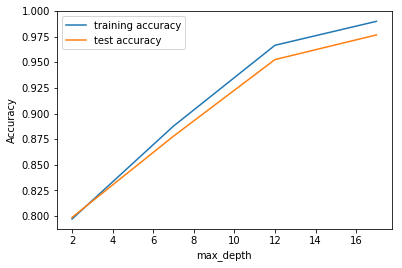

In [174]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning max_features, which is the maximum numbre of features considered for splitting at a node.

In [175]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [176]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.415897,0.043448,0.811564,0.810916,4,{'max_features': 4},5,0.800052,0.807441,0.821905,...,0.816230,0.813212,0.820681,0.815011,0.798953,0.799077,0.141293,0.009592,0.010034,0.007127
1,0.427735,0.045236,0.821406,0.822682,8,{'max_features': 8},4,0.816017,0.824684,0.822036,...,0.830759,0.828033,0.815707,0.811674,0.822513,0.833955,0.033743,0.000743,0.005489,0.008233
2,0.628796,0.049086,0.821956,0.824168,14,{'max_features': 14},3,0.817325,0.825895,0.828971,...,0.836257,0.835035,0.816754,0.820606,0.810471,0.816843,0.162475,0.011214,0.009318,0.006170
3,0.687864,0.051961,0.832819,0.835188,20,{'max_features': 20},2,0.831589,0.841568,0.841664,...,0.832984,0.830487,0.830628,0.831076,0.827225,0.832057,0.068632,0.011265,0.004814,0.004908
4,0.685296,0.045900,0.834808,0.837138,24,{'max_features': 24},1,0.833944,0.841535,0.838786,...,0.832199,0.832515,0.831675,0.828753,0.837435,0.848024,0.011662,0.010071,0.002832,0.006851


C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


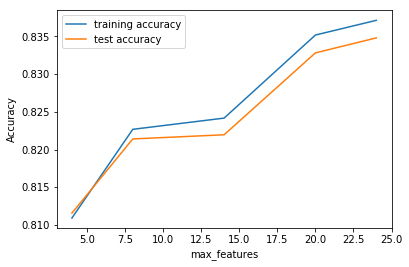

In [177]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Grid Search to Find Optimal Hyperparameters

In [178]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [179]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 11.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [180]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8584964925138729 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [181]:
#Fitting the final model with the best parameters obtained from grid search.
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [182]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [183]:
# predict
predictions = rfc.predict(X_test)

In [184]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.92      0.87      8187
          1       0.91      0.82      0.86      8187

avg / total       0.87      0.87      0.87     16374



In [185]:
print(confusion_matrix(y_test,predictions))

[[7514  673]
 [1511 6676]]


In [186]:
print(accuracy_score(y_test,predictions))

0.8666178087211432


# We see Random Forest Model overall AUC score of 0.86

# Building the other Models - SVM - Non Linear

In [188]:
# Model Building
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# using rbf kernel, C=1, default value of gamma
model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [189]:
# Model Evaluation
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[7232,  955],
       [ 869, 7318]], dtype=int64)

In [ ]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.8886038842066691
precision 0.8845642451347758
recall 0.8938561133504336


# Hyperparameter Tuning -The choice of kernel (linear, rbf etc.),C,gamma
#We'll use the GridSearchCV() method to tune the hyperparameters

In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

# Building and Evaluating the Final Model
Build and evaluate the final model, i.e. the model with highest test accuracy.

In [ ]:
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.0001, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.0001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))

# Conclusion

In [ ]:
*********Need to Add***************